## 2-4. 데이터셋 만들기

[구글 코랩(Colab)에서 실행하기](https://colab.research.google.com/github/lovedlim/tensorflow/blob/main/Part%203/3.2_simple_linear_regression.ipynb)

In [ ]:
import numpy as np

# 샘플 데이터셋 생성
x = np.arange(1, 6)

# y = 3x + 2
y = 3 * x + 2
print(x)
print(y)

[1 2 3 4 5]
[ 5  8 11 14 17]


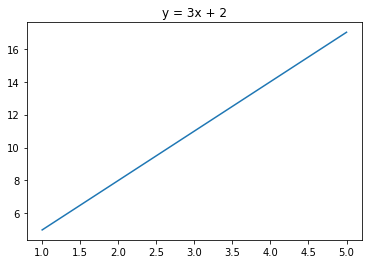

In [ ]:
import matplotlib.pyplot as plt

# 시각화
plt.plot(x, y)
plt.title('y = 3x + 2')
plt.show()


## 2-5-1. 모델 구조

In [ ]:
import tensorflow as tf

In [ ]:
# 리스트형
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10), 
    tf.keras.layers.Dense(5), 
    tf.keras.layers.Dense(1), 
])

In [ ]:
# add 함수로 레이어 추가
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(5))
model.add(tf.keras.layers.Dense(1))

## 2-5-2. 입력 데이터 형태

In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.Sequential([
    # 입력 데이터의 shape = (150, 4) 인 경우 input_shape 지정 
    tf.keras.layers.Dense(10, input_shape=[4]), 
    tf.keras.layers.Dense(5), 
    tf.keras.layers.Dense(1), 
])

## 2-5-3. 단순선형회귀 모델 생성

In [ ]:
# 단순선형회귀 모델 생성
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])                    
])

## 2-6. 모델 요약

In [ ]:
# 모델 요약
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


## 2-7. 컴파일

In [ ]:
# 긴 문자열 지정
model.compile(optimizer='sgd', loss='mean_squared_error', 
              metrics=['mean_squared_error', 'mean_absolute_error'])

In [ ]:
# 짧은 문자열 지정
model.compile(optimizer='sgd', loss='mse', metrics=['mse', 'mae'])

In [ ]:
# 클래스 인스턴스 지정
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.005), 
              loss=tf.keras.losses.MeanAbsoluteError(), 
              metrics=[tf.keras.metrics.MeanAbsoluteError(), 
                       tf.keras.metrics.MeanSquaredError()
                       ])

## 2-8. 훈련

In [ ]:
# 컴파일
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

# 훈련
history = model.fit(x, y, epochs=1200)

Epoch 1/1200
1/1 [==============================] - 2s 2s/step - loss: 82.4756 - mae: 8.5420
Epoch 2/1200
1/1 [==============================] - 0s 4ms/step - loss: 48.1883 - mae: 6.5719
Epoch 3/1200
1/1 [==============================] - 0s 9ms/step - loss: 28.2065 - mae: 5.0678
Epoch 4/1200
1/1 [==============================] - 0s 4ms/step - loss: 16.5613 - mae: 3.9194
Epoch 5/1200
1/1 [==============================] - 0s 6ms/step - loss: 9.7742 - mae: 3.0426
Epoch 6/1200
1/1 [==============================] - 0s 8ms/step - loss: 5.8181 - mae: 2.3731
Epoch 7/1200
1/1 [==============================] - 0s 5ms/step - loss: 3.5119 - mae: 1.8619
Epoch 8/1200
1/1 [==============================] - 0s 7ms/step - loss: 2.1672 - mae: 1.4714
Epoch 9/1200
1/1 [==============================] - 0s 4ms/step - loss: 1.3827 - mae: 1.1732
Epoch 10/1200
1/1 [==============================] - 0s 5ms/step - loss: 0.9247 - mae: 0.9453
Epoch 11/1200
1/1 [==============================] - 0s 5ms/step -

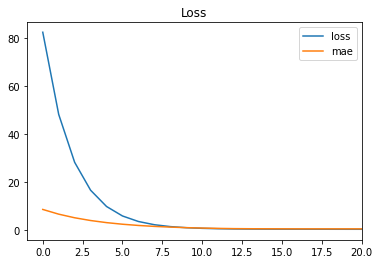

In [ ]:
import matplotlib.pyplot as plt

# 20 에포크까지 Loss 수렴에 대한 시각화
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['mae'], label='mae')
plt.xlim(-1, 20)
plt.title('Loss')
plt.legend()
plt.show()

## 검증

In [ ]:
# 검증
model.evaluate(x, y)

1/1 [==============================] - 0s 215ms/step - loss: 9.0305e-05 - mae: 0.0082


[9.030506771523505e-05, 0.00815649051219225]

## 예측

In [ ]:
# 예측
model.predict([10])

array([[32.03942]], dtype=float32)